In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

After analyzing some of the baseball data provided, I had a couple of questions:

    1) How does the number of at-bats relate to the number of singles, doubles, triples, and homeruns? 
    2) How does the number of strikeouts relate to the number of homeruns a player hits?
    3) What is the relationship between the number of games started, putouts, errors, and assists?

The first step in answering the questions is to read in the data files using the pd.read_csv funcion.

In [2]:
batting_df = pd.read_csv('batting.csv') #reading in the batting data

In [3]:
fielding_df = pd.read_csv('fielding.csv') #reading in the fiedling data

After reading in the data, I was interested in learning about how many unique players were part of the data. This was calculated using the unique method on the playerID series and then taking the length of that set. 

In [4]:
len(set(batting_df.playerID)) # use the unique method on the playerID series
len(batting_df.playerID.unique()) # use set on the playerID series

18659

In [5]:
len(set(fielding_df.playerID)) # use the unique method on the playerID series
len(fielding_df.playerID.unique()) # use set on the playerID series

18465

In 1969, two new rules were introduced to the benefit of the hitters: the pitcher's mound was dropped five inches and the strike zone was shrunk to the area from the armpits to the top of the hitter's knees (Baseball Almanac). Since these new rules effected batting statistics thereafter, I do not want to consider players before this time period.

In [6]:
year_restriction=batting_df.yearID > 1969 # create constraint
batting_post1969= batting_df[year_restriction] # restrict the DataFrame
batting_post1969_players= batting_df[year_restriction].playerID # just the players
batting_post1969_players.unique() # unique players wiith year restriction

array(['aaronha01', 'aaronto01', 'abernte02', ..., 'wojcias01',
       'wrighmi01', 'zychto01'], dtype=object)

In [7]:
year_restriction=fielding_df.yearID > 1969 # create constraint
fielding_post1969= fielding_df[year_restriction] # restrict the DataFrame
fielding_post1969_players= fielding_df[year_restriction].playerID # just the players
fielding_post1969_players.unique() # unique players wiith year restriction

array(['aaronha01', 'aaronto01', 'abernte02', ..., 'keplema01', 'noelri01',
       'reedmi02'], dtype=object)

After restricting for the year, I want to ensure that the restriction has been taken into account. One way to determine this is to print out the length of the post 1969 arrays. 

In [8]:
print len (batting_post1969_players.unique())
print len (fielding_post1969_players.unique())

8863
8828


Judging by the much smaller lengths of the arrays, the restriction has worked. The arrays do not need to be the same length because the batting and fielding data are not being compared. However, it is important that the arrays are converted back to DataFrames for future calculations.

In [9]:
batting_post1969_df = pd.DataFrame(data=batting_post1969) #converting batting data to DataFrame

In [10]:
fielding_post1969_df = pd.DataFrame(data=fielding_post1969) #converting fielding data to DataFrame

The describe function can be used on the DataFrames to determine the mean, standard deviation, and interquartile range (IQR) for the respective columns. The results for the batting data can be seen below.

In [11]:
print batting_post1969_df.describe()

             yearID         stint             G            AB             R  \
count  53165.000000  53165.000000  53165.000000  48016.000000  48016.000000   
mean    1994.672153      1.077269     52.177824    143.054878     18.669256   
std       13.125956      0.280286     46.673373    187.662236     27.650167   
min     1970.000000      1.000000      0.000000      0.000000      0.000000   
25%     1984.000000      1.000000     14.000000      3.000000      0.000000   
50%     1996.000000      1.000000     35.000000     45.000000      4.000000   
75%     2006.000000      1.000000     79.000000    238.000000     28.000000   
max     2015.000000      4.000000    163.000000    716.000000    152.000000   

                  H            2B            3B            HR           RBI  \
count  48016.000000  48016.000000  48016.000000  48016.000000  48016.000000   
mean      37.275512      6.847155      0.864358      3.828661     17.618023   
std       52.641064     10.250501      1.809399    

Although the describe function is useful, "Pearson's R" gives a better idea of how correlated different factors are. Below, there is a table with the Pearson's R coefficients between different variable. The values range from 0, not correlated, to 1, very highly correlated. The values can also be positive or negative, indicating a positive or negative correlation.  The number of singles, doubles, and home-runs are highly correlated to the number of at-bats with correlations of 0.990292, 0.944652, and 0.785790 respetively. Triples are slightly less correlated with a Pearson's R of 0.692557.

The table below can be used to see the correlation between the number of homeruns and strikeouts. Strikeouts and homeruns have a moderately highly correlation of 0.826734.

It is important to remember in all cases that correlation does not imply causation. Therefore, we cannot say that an increase in the number of at-bats causes an increase in any type of hit or that strikeouts lead to more homeruns. 

In [12]:
batting_post1969.corr(method='pearson', min_periods=1)

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
yearID,1.000000,0.027715,-0.049673,-0.106537,-0.075392,-0.095123,-0.034395,-0.112297,-0.013099,-0.067601,-0.071487,-0.144387,-0.098734,-0.013117,-0.115393,0.046848,-0.154727,-0.090076,-0.092642
stint,0.027715,1.000000,-0.144935,-0.112890,-0.104985,-0.108114,-0.103323,-0.073308,-0.081925,-0.099822,-0.062267,-0.072332,-0.097404,-0.105465,-0.073600,-0.072532,-0.081208,-0.086193,-0.096014
G,-0.049673,-0.144935,1.000000,0.931545,0.891828,0.917222,0.873829,0.639071,0.726449,0.864445,0.538850,0.631404,0.835788,0.837849,0.598068,0.600396,0.318482,0.752988,0.813016
AB,-0.106537,-0.112890,0.931545,1.000000,0.963346,0.990292,0.944652,0.692557,0.785790,0.930567,0.592925,0.679112,0.881776,0.892840,0.628791,0.644265,0.327819,0.806024,0.872828
R,-0.075392,-0.104985,0.891828,0.963346,1.000000,0.972993,0.938042,0.698810,0.837770,0.937933,0.637227,0.685926,0.910910,0.872778,0.641259,0.657606,0.263240,0.786906,0.817742
H,-0.095123,-0.108114,0.917222,0.990292,0.972993,1.000000,0.955457,0.701439,0.793134,0.938857,0.600907,0.680121,0.878120,0.863431,0.643786,0.641151,0.292402,0.805803,0.867549
2B,-0.034395,-0.103323,0.873829,0.944652,0.938042,0.955457,1.000000,0.628624,0.795918,0.925036,0.526056,0.600417,0.849862,0.849910,0.625734,0.644709,0.224964,0.789725,0.836616
3B,-0.112297,-0.073308,0.639071,0.692557,0.698810,0.701439,0.628624,1.000000,0.430848,0.584244,0.637205,0.656648,0.570770,0.578459,0.378667,0.397444,0.297518,0.511367,0.512642
HR,-0.013099,-0.081925,0.726449,0.785790,0.837770,0.793134,0.795918,0.430848,1.000000,0.920947,0.336158,0.398888,0.803122,0.826734,0.660339,0.591577,0.017473,0.698829,0.707215
RBI,-0.067601,-0.099822,0.864445,0.930567,0.937933,0.938857,0.925036,0.584244,0.920947,1.000000,0.459456,0.542009,0.879620,0.875298,0.691319,0.636156,0.159508,0.830714,0.844891


It is important to visualize the data. Below, I created a function that can be used to create bar graphs. The function takes five arguments: the subset of the DataFrame that is to be plotted, the values for the x-axis bins, and the titles of the graph, x- and y-axes. The output of the function will be a bar graph with the specified values.

In [13]:
def create_bar_chart(subset, title_name, x_bins, x_axis_title, y_axis_title):
    ax = subset.plot(kind='bar', x = x_bins, title = title_name, figsize=(15, 10), legend=True, fontsize=12) #specify bar graph
    ax.set_xlabel(x_axis_title, fontsize=12) #label x-axis
    ax.set_ylabel(y_axis_title, fontsize = 12) #label y-axis
    plt.show()

Below, I used the create_bar_chart function created above to create a bar graph. The bar graph takes a subset of data that includes singles, doubles, triples, homeruns and the number of at-bats. The number of hits are grouped together per 100 at-bats.

On the x-axis, the number of at-bats are grouped together per 100 at-bats, ranging from 0 to 700 at-bats. The y-axis represents the total number of hits. Each color bar represents a particular type of hit, as represented by the legend on the top right corner of the graph. H stands for a single, 2B for a double, 3B for a triple, and HR for a home-run.

It can be seen that as the number at-bast increase, so does the total number of hits. Singles are the most common hit, followed by doubles, homeruns, and triples. 

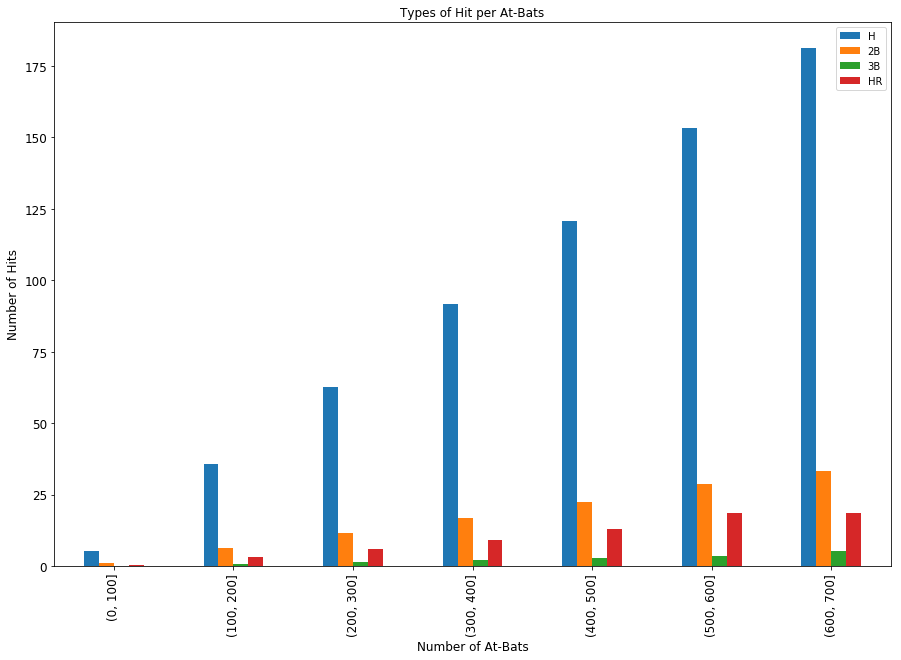

In [14]:
import matplotlib.pyplot as plt #import the library

batting_post1969_new = batting_post1969.copy() #make a copy of the DataFrame so don't alter original DataFrame
batting_post1969_new['ABnew'] = pd.cut(batting_post1969_new['AB'], [0, 100, 200, 300, 400, 500, 600, 700]) #cut the data so that the data is read faster. At-bats is brokedn up into groups of 100

batting_subset = batting_post1969_new[['H','2B','3B','HR','ABnew']].groupby('ABnew', as_index=False).mean()#use groupby function to group data by at-bats

batting_title_name = "Types of Hit per At-Bats"
batting_x_bins = 'ABnew'
batting_x_axis_title = 'Number of At-Bats'
batting_y_axis_title = 'Number of Hits'

create_bar_chart(batting_subset, batting_title_name, batting_x_bins, batting_x_axis_title, batting_y_axis_title)

Below, I created a line graph to depict the relationship between the number of homeruns and strikeouts. The x-axis represents the number of strikeouts, per 50 strikoeuts, ranging from 0 to 250 strikeouts. The graph indicates that as the number of strikeouts increase, so does the number of homeruns. This is expected because of the 0.82673 correlation between the two variables . 

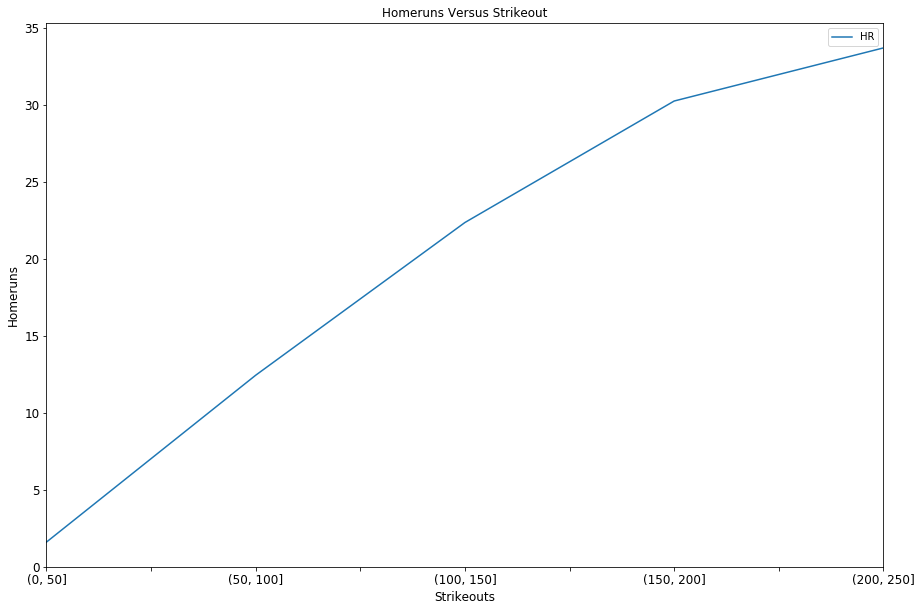

In [15]:
batting_post1969_new['SOnew'] = pd.cut(batting_post1969_new['SO'], [0, 50, 100, 150, 200, 250]) #cut the data so that the data is read faster. At-bats is brokedn up into groups of 100

strikeout_subset = batting_post1969_new[['HR','SOnew']].groupby('SOnew', as_index=False).mean()#use groupby function to group data by at-bats

ax = strikeout_subset.plot(kind='line', x = 'SOnew', title ="Homeruns Versus Strikeout", figsize=(15, 10), legend=True, fontsize=12) #specify bar graph
ax.set_xlabel("Strikeouts", fontsize=12) #specify x-axis title
ax.set_ylabel("Homeruns", fontsize = 12)

plt.show()

Using the describe function on the fielding data.

In [16]:
print fielding_post1969_df.describe()

             yearID         stint             G            GS       InnOuts  \
count  99184.000000  99184.000000  99184.000000  55976.000000  82440.000000   
mean    1993.954801      1.075879     33.173153     26.468647    695.917928   
std       13.057736      0.277813     40.369143     40.469303   1051.859965   
min     1970.000000      1.000000      1.000000      0.000000      0.000000   
25%     1983.000000      1.000000      4.000000      1.000000     54.000000   
50%     1995.000000      1.000000     16.000000      7.000000    214.000000   
75%     2005.000000      1.000000     45.000000     32.000000    729.000000   
max     2015.000000      4.000000    163.000000    163.000000   4469.000000   

                 PO             A             E            DP           PB  \
count  85067.000000  85067.000000  85067.000000  85067.000000  4860.000000   
mean      73.580448     25.331315      1.950098      5.988456     3.142798   
std      164.940193     68.746633      3.709389     18

Pearson's R table for the fielding data. We can see that assists, errors, and putouts are all positively correlated to the games started, with values of 0.553539, 0.741759, and 0.732167, respectively.

In [17]:
fielding_post1969.corr(method='pearson', min_periods=1)

,yearID,stint,G,GS,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR
yearID,1.000000,0.036538,-0.003736,-0.031327,-0.033987,-0.014221,0.001643,-0.073399,0.011488,-0.071690,0.055058,-0.035779,-0.141434,-0.113066
stint,0.036538,1.000000,-0.105313,-0.085815,-0.093337,-0.066314,-0.056884,-0.074471,-0.050845,-0.106585,-0.106394,-0.133457,-0.128060,-0.066082
G,-0.003736,-0.105313,1.000000,0.949754,0.952919,0.685743,0.546548,0.702666,0.527970,0.701528,0.902518,0.897270,0.898942,0.531660
GS,-0.031327,-0.085815,0.949754,1.000000,0.996259,0.732167,0.553539,0.741759,0.538721,0.706052,0.905827,0.904121,0.934314,0.540911
InnOuts,-0.033987,-0.093337,0.952919,0.996259,1.000000,0.729169,0.578477,0.741093,0.566128,0.698924,0.906321,0.896737,0.901937,0.542848
PO,-0.014221,-0.066314,0.685743,0.732167,0.729169,1.000000,0.286608,0.475934,0.639479,0.672664,0.906032,0.870311,0.845552,0.520737
A,0.001643,-0.056884,0.546548,0.553539,0.578477,0.286608,1.000000,0.775424,0.782112,0.679030,0.868796,0.859428,0.935901,0.593220
E,-0.073399,-0.074471,0.702666,0.741759,0.741093,0.475934,0.775424,1.000000,0.633429,0.612938,0.729565,0.768351,0.757613,0.477234
DP,0.011488,-0.050845,0.527970,0.538721,0.566128,0.639479,0.782112,0.633429,1.000000,0.580352,0.773954,0.739603,0.824732,0.511814
PB,-0.071690,-0.106585,0.701528,0.706052,0.698924,0.672664,0.679030,0.612938,0.580352,1.000000,0.709578,0.675836,0.648183,0.379044


Below, I used the create_bar_chart function to create a graph for a subset of the fielding data including the putouts, assists, errors, and games started. The data is grouped together per 50 games started, ranging from 0 to 200 games. The x-axis represents the the number of games started, whereas the y-axis represents total number of putouts, errors, and assists. Each colored bar corresponds to a particular statistic, as indicated by the legend on the top left corner. Blue if for putouts, orange is for assists, and green is for the number of errors.

As the number of games started increases, so does the occurence of put-outs, assists, and erros. 

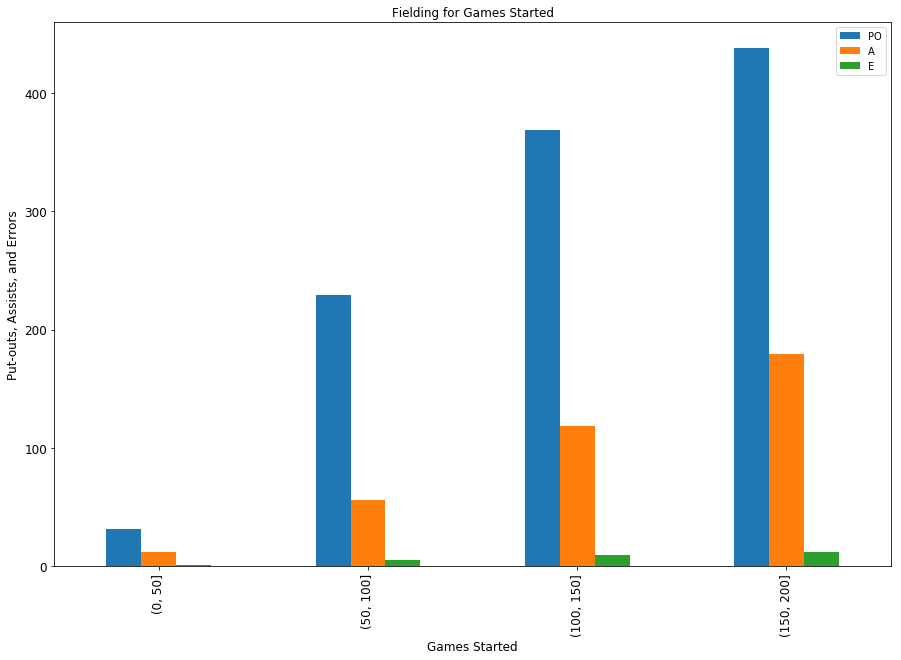

In [18]:
fielding_post1969_new = fielding_post1969.copy() #make a copy of the DataFrame so don't alter original DataFrame
fielding_post1969_new['GSnew'] = pd.cut(fielding_post1969_new['GS'], [0, 50, 100, 150, 200]) #cut the data so that the data is read faster. Games started is brokedn up into groups of 50

fielding_subset = fielding_post1969_new[['PO','A','E','GSnew']].groupby('GSnew', as_index=False).mean() #use groupby function to group data by games started
fielding_title_name = "Fielding for Games Started"
fielding_x_bins = 'GSnew'
fielding_x_axis_title = "Games Started"
fielding_y_axis_title = 'Put-outs, Assists, and Errors'

create_bar_chart(fielding_subset, fielding_title_name, fielding_x_bins, fielding_x_axis_title, fielding_y_axis_title) 

Conclusion:

Despite the thoroughness of the data provided, there are some limitations for the analysis. One issue is the inability to prove any causal effects. In order for a causal realtionship to be proven, there would need be controlled, blinded experiment, which cannot be done during a Major League Baseball season. Additionally, there may be many different "lurking" variables that effect the data. For example, where the hits per number of at-bats versus right or left-handed pitchers? Are the hitters with a high strike out rate instructed by their managers to only attempt to hit homeruns, or is their job to simply get one base? Without knowing the answer to factors such as these, it is hard to analyze the data further. Further research would hope to account for more of this ambigious data to get a better idea of how the different statistics relate to one another.

Resources:

http://www.baseball-almanac.com/rulechng.shtml